<a href="https://colab.research.google.com/github/vishnouvina/csc2516/blob/main/CSC2516_Homework_2_VishnouVINAYAGAME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Logistic Regression for Binary Classification (2 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$.

1. Let $\mathbf{o} \in \mathbb{R^K}$ with $K$ the number of classes, and $c$ with $c \in \mathbb{R}$.

$$p(y|\mathbf{o}+c) = \mathrm{softmax}(\mathbf{o}+c)_y = \frac{\exp(o_y+c)}{\sum_{y'} \exp(o_{y'}+ c)} = \frac{\exp(o_y)\exp(c)}{\sum_{y'} \exp(o_{y'})\exp(c)} = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$.

We were able to simplify $\exp(c)$ because it is non-zero (the exponential function always returns a strictly positive result).

2. With $o = o_1$ and $o_{-1} = -1$, we can then simplify the following expression:

$$p(y=1|o) = \frac{\exp(o)}{\exp(0) + \exp(o)} = \frac{\exp(o)}{1 + \exp(o)} = \frac{1}{1 + \exp(-o)} $$.

For the last step, we factorized $\exp(o)$ on both sides of the fraction.

3. We can then derive the logistic loss: we have the expression of $p(y=1|o)$, and $p(y=-1|o)$ is :

$$ p(y=-1|o) = 1 - p(y=1|o) = 1 - \frac{1}{1 + \exp(-o)} = \frac{\exp(-o)}{1 + \exp(-o)} = \frac{1}{1 + \exp(o)} $$

Hence, $p(y|o) = \frac{1}{1 + \exp(-y \cdot o)}$, and

$$ -\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

4. For $y = 1$ the logistic loss is equal to:

$$ l(y=1,o) = -\log p(y=1|o) = \log (1 + \exp(-o))$$

When $o \to \infty$, $\exp(-o) \to 0$ and so, $l(y=1,o) \to 0$ because $log(1) = 0$.

When $o \to -\infty$, $\exp(-o) \to \infty$ and so, $l(y=1,o) \to \infty$ as $log(t) \to \infty$ when $t \to \infty$.

# 2. Implementing the logistic loss (1.5 points)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in numpy.
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Derive the derivative of $l(y,o)$ and show your work. Then, in a new plot, plot derivative of $l(y,o)$ with respect to $o$ for $y \in \{-1, 1\}$ and for $o \in [-5, 5]$ without using any automatic differentiation software (e.g. Pytorch, TensorFlow, JAX, etc.).
1. In a new plot, plot $l(y,o)$ with $y = 1$ and $o ∈ [-1000, 1000]$. What happens for large positive and large negative values of $o$? Why?

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def log_loss(y,o):
  return np.log(1+np.exp(-y*o))

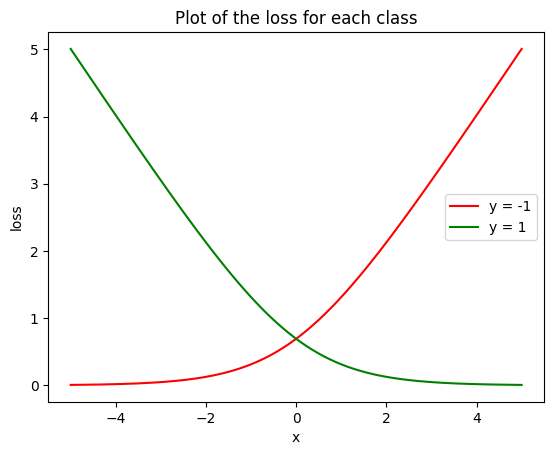

In [71]:
o = np.linspace(-5,5,1000)
y = np.array([-1,1])
l = log_loss(y.reshape(2,-1),o.reshape(-1,1000)).reshape(2,-1)

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(o,l[0], color = 'r')
ax.plot(o,l[1], color = 'g')
ax.set_xlabel('x')
ax.set_ylabel('loss')
ax.legend(['y = -1', 'y = 1'])
plt.title('Plot of the loss for each class')

plt.show()

Let's take the derivative of $l(y,o) = \log (1 + \exp(-y \cdot o))$ with respect to o, with a fixed value of y:

$$ \frac{\partial{l(y,o)}}{\partial{o}}(y,o) = -y \cdot \frac{ \exp(-y \cdot o)}{1 + \exp(-y \cdot o)} = -y \cdot \frac{1+\exp(-y \cdot o)-1}{1 + \exp(-y \cdot o)} =  -y \cdot (1 - \frac{1}{1 + \exp(-y \cdot o)}) =  -y + y \cdot \frac{1}{1 + \exp(-y \cdot o)}$$


In [72]:
def grad_log_loss(y,o):

  return -y + y/(1+np.exp(-y*o))

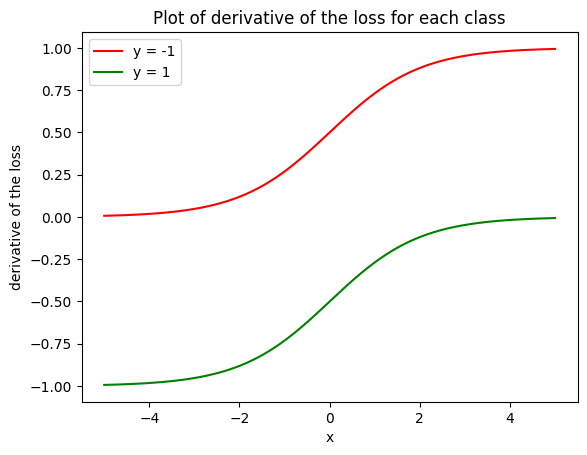

In [73]:
o = np.linspace(-5,5,1000)
y = np.array([-1,1])
g_l = grad_log_loss(y.reshape(2,-1),o.reshape(-1,1000)).reshape(2,-1)

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(o,g_l[0], color = 'r')
ax.plot(o,g_l[1], color = 'g')
ax.set_xlabel('x')
ax.set_ylabel('derivative of the loss')
ax.legend(['y = -1', 'y = 1'])
plt.title('Plot of derivative of the loss for each class')

plt.show()

<ipython-input-70-1ccd0f4d925e>:2: RuntimeWarning: overflow encountered in exp
  return np.log(1+np.exp(-y*o))


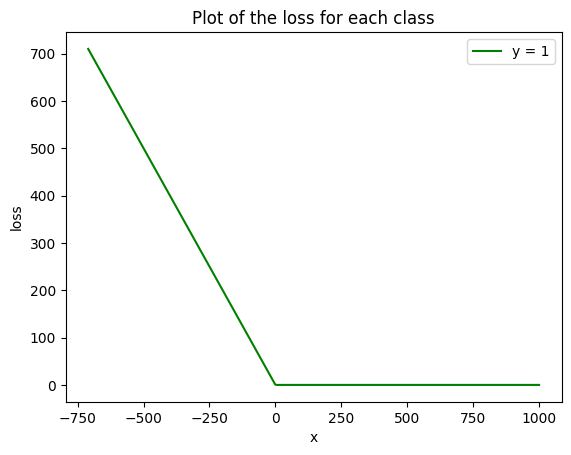

In [74]:
o = np.linspace(-1000,1000,1000)
y = np.array([1])
l = log_loss(y.reshape(1,-1),o.reshape(-1,1000)).reshape(1,-1)

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(o,l[0], color = 'g')
ax.set_xlabel('x')
ax.set_ylabel('loss')
ax.legend(['y = 1'])
plt.title('Plot of the loss for each class')

plt.show()

We can use Taylor's expansion for the exponential function and the function $ x \rightarrow log(1+x)$ and approximate the logistic loss function for large positive and large negative values of x:

When $o \to \infty$, $\exp(-o) \to 0$, and therefore $ l(y=1,o) = \log (1 + \exp(-o)) \approx \exp(-o)$, and reaches a plateau at a exponential rate, that we can observe on the graph above.

When $o \to -\infty$, $\exp(-o) = \exp(\lvert o \rvert) \to \infty$, and therefore $ l(y=1,o) = \log (1 + \exp(\lvert o \rvert)) \approx \log (\exp(\lvert o \rvert)) \approx \lvert o \rvert $, and therefore has a linear shape, that we can easily notice on the graph above.

Therefore, for large values, the logistic loss function can be approximated by a piecewise linear function, and could be approximated by an opposite Rectified Linear Unit function: $ x \rightarrow ReLU(x) = max(0,-x)$.

# 3. Implementing logistic regression (1.5 points)

Implement a basic logistic regression model and fit it to the data from the new `generate_data` function (below) using gradient descent.
Your model should take the form `o = m*x + b`, where `o` is the output (logits), `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
Train the model using the logistic loss function you derived in the previous problem.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
Print out or plot the loss over the course of training.
You should be able to get a loss that is close to zero by the end of training - make sure you achieve this and **explain why**.

In [75]:
import numpy as np

def generate_data():
    size = 1000
    rng = np.random.default_rng(seed=0)
    y = 2*rng.integers(0, 2, size) - 1
    x = rng.standard_normal((1000,)) + 4*y
    return x, y

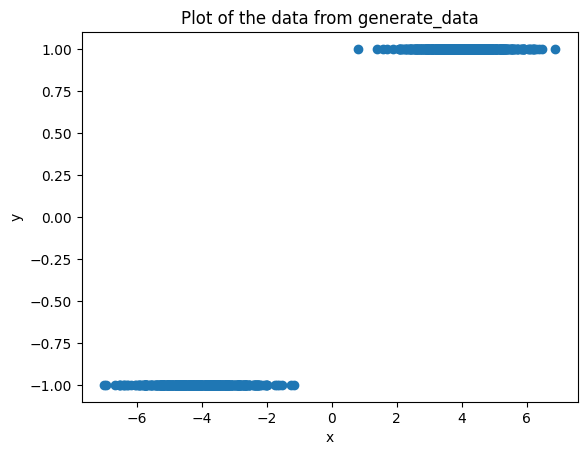

In [76]:
x,y = generate_data()


fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Plot of the data from generate_data')

plt.show()

In [77]:
def log_loss_gradient_descent(x,y, lr=0.1, nb_steps = 10000, criterion = 1e-4):
  m, b = np.random.rand(),np.random.rand()
  current_loss, iter_nb = [np.mean(log_loss(y,m*x+b))], 0

  while iter_nb < nb_steps or current_loss[-1] > criterion:
      m = m-lr*np.nanmean(x*grad_log_loss(y,m*x+b))
      b = b-lr*np.nanmean(grad_log_loss(y,m*x+b))
      current_loss.append(np.nanmean(log_loss(y,m*x+b)))
      iter_nb += 1

  return m, b, current_loss

In [78]:
m, b, current_loss = log_loss_gradient_descent(x,y)

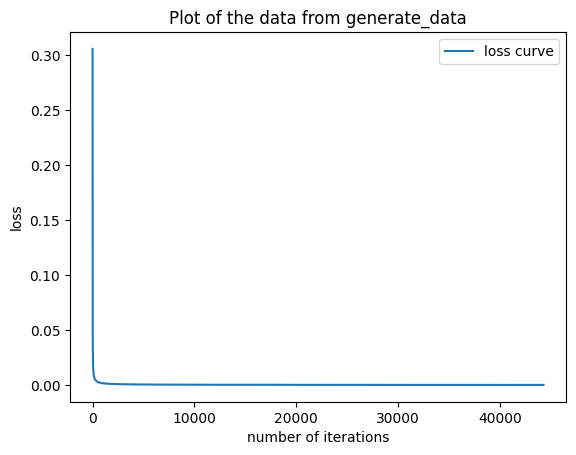

In [82]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(current_loss)
ax.set_xlabel('number of iterations')
ax.set_ylabel('loss')
ax.legend(['loss curve'])

plt.title('Plot of the data from generate_data')

plt.show()

At the end of the training, the loss converges to a value under the criterion which has been set to $10^{-4}$. The probabilities outputed by the model should the be accurate, and this can be explained by looking at the graph of (x,y) : it is clearly linearly separable and classifiable and a solution to the classification problem exists, and the gradient descent algorithm has found one among the solutions.

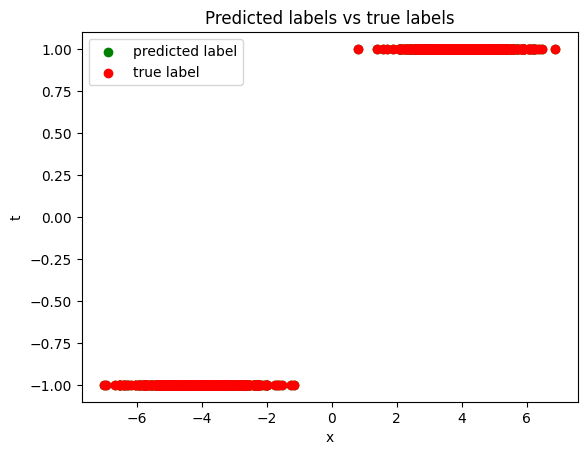

In [84]:
#generate the softmax probability output from o = mx+b
soft_o = 1/(1+np.exp(-(m*x+b)))

y_hat = []

#binary classification from the probability of an observation sample being labelled 1 or not

for soft_o_i in soft_o:
  if soft_o_i > 0.5:
    y_hat.append(1)
  else:
    y_hat.append(-1)

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x,y_hat, color = 'g')
ax.scatter(x,y, color = 'r')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.legend(['predicted label', 'true label'])

plt.title('Predicted labels vs true labels')

plt.show()